# Linear Regression
## 自作のトイデータで実験

In [1]:
from typing import Tuple

import numpy as np
import matplotlib.pyplot as plt

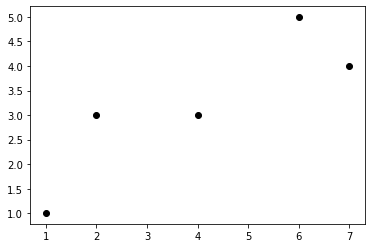

In [2]:
x = np.array([1, 2, 4, 6, 7])
y = np.array([1, 3, 3, 5, 4])
plt.scatter(x, y, color="k")
plt.show()

In [3]:
def solve_linear_regression(xs :np.ndarray, ys :np.ndarray) -> Tuple[float, float]:
    '''
    Compute optimal parameter of linear function for given (xs, ys)

    Parameters
    ----------
    xs: np.ndarray:
        data list of input (scalar)
    ys: np.ndarray:
        data list of target (scalar)

    Returns
    -------
    w: float
        optimal w parameter of linear model (y = w * x + b)
    b: float
        optimal b parameter of linear model (y = w * x + b)
    '''

    n = len(x) # number of data
    w = ((np.dot(x, y) - y.sum() * x.sum() / n) /
         ((x**2).sum() - x.sum()**2 / n))
    b = (y.sum() - w * x.sum()) / n

    return w, b

In [4]:
w, b = solve_linear_regression(x, y)
print(f"w = {w}, b = {b}")

w = 0.5, b = 1.2


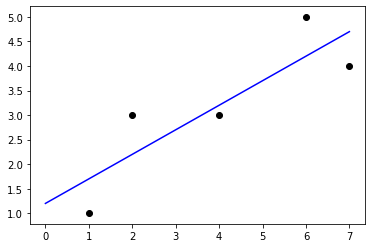

In [5]:
plt.scatter(x, y, color="k")
xmax = x.max()
plt.plot([0, xmax], [b, w * xmax + b], color="b")
plt.show()

## 生成した擬似データで実験
x: 家の坪数, y: 家の価格　とした時の価格予想モデル (1次関数) を実装する

In [6]:
n = 50
x = np.linspace(1, 100, n)
y = x * 30 + np.random.randn(n)*(x*5)

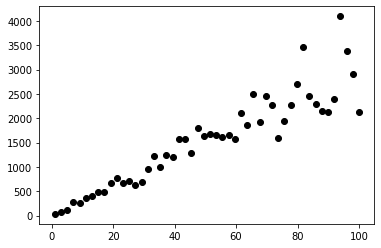

In [7]:
plt.scatter(x, y, color="k")
plt.show()

In [8]:
w, b = solve_linear_regression(x, y)
print(f"w = {w}, b = {b}")

w = 29.762921942381155, b = 45.33590633631306


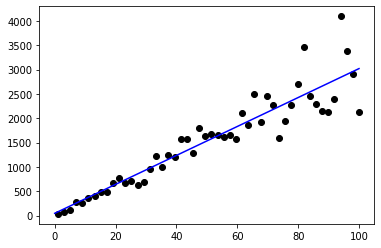

In [9]:
plt.scatter(x, y, color="k")
xmax = x.max()
plt.plot([0, xmax], [b, w * xmax + b], color="b")
plt.show()

### 予測してみよう！


In [10]:
tsubo = 40
price = w * tsubo + b
print(price)

1235.8527840315592


## Scikit Learnを使ってみよう！
MLの代表的なモデルはimportするだけで使用することができ，様々な機能を備えていたり，高速な最適化が内部で行われていたりする

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
model.score(x.reshape(-1, 1), y)

0.8606601087773972

In [13]:
price = model.predict(np.array(tsubo).reshape(-1, 1))
print(price[0])

1235.8527840315592
